<a href="https://colab.research.google.com/github/MayarAtef16/Default-of-Credit-Card-Clients/blob/main/Default_of_Credit_Card_Clients2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mayar Abdelhamid**

# Download Dataset

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mayarabdelhamid1","key":"8c6651a0258d3bee599da39d82c5dd71"}'}

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


In [ ]:
!kaggle datasets download -d uciml/default-of-credit-card-clients-dataset

  0% 0.00/0.98M [00:00<?, ?B/s]
100% 0.98M/0.98M [00:00<00:00, 51.2MB/s]


In [ ]:
! kaggle datasets list

ref                                                              title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/top-spotify-songs-2023                          Most Streamed Spotify Songs 2023                47KB  2023-08-26 11:04:57          10918        353  1.0              
carlmcbrideellis/zzzs-lightweight-training-dataset-target        Zzzs: Lightweight training dataset + target    185MB  2023-09-18 18:16:21            384         53  1.0              
joebeachcapital/students-performance                             Students Performance                             2KB  2023-08-31 00:50:11           3562         92  1.0              
josephinelsy/spotify-top-hit-playlist-2010-2022                  Spotify Top Hit

In [ ]:
!unzip -q /content/default-of-credit-card-clients-dataset.zip -d /content/

# Data Content

There are 25 variables:

- ID: ID of each client
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit


- SEX: Gender (1=male, 2=female)


- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)


- MARRIAGE: Marital status (1=married, 2=single, 3=others)


- AGE: Age in years


- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)


- PAY_2: Repayment status in August, 2005 (scale same as above)


- PAY_3: Repayment status in July, 2005 (scale same as above)


- PAY_4: Repayment status in June, 2005 (scale same as above)


- PAY_5: Repayment status in May, 2005 (scale same as above)


- PAY_6: Repayment status in April, 2005 (scale same as above)


- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)


- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)


- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)


- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)


- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)


- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)


- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)


- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)


- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)


- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)


- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)


-  PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)


- default.payment.next.month: Default payment (1=yes, 0=no)

#Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

#Data Analysis , Exploration, Visualization

- Read the first 5 rows

In [ ]:
df = pd.read_csv('/content/UCI_Credit_Card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

From the last Cell We don't have null values

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [ ]:
correlation_matrix = df.corr(method='pearson')

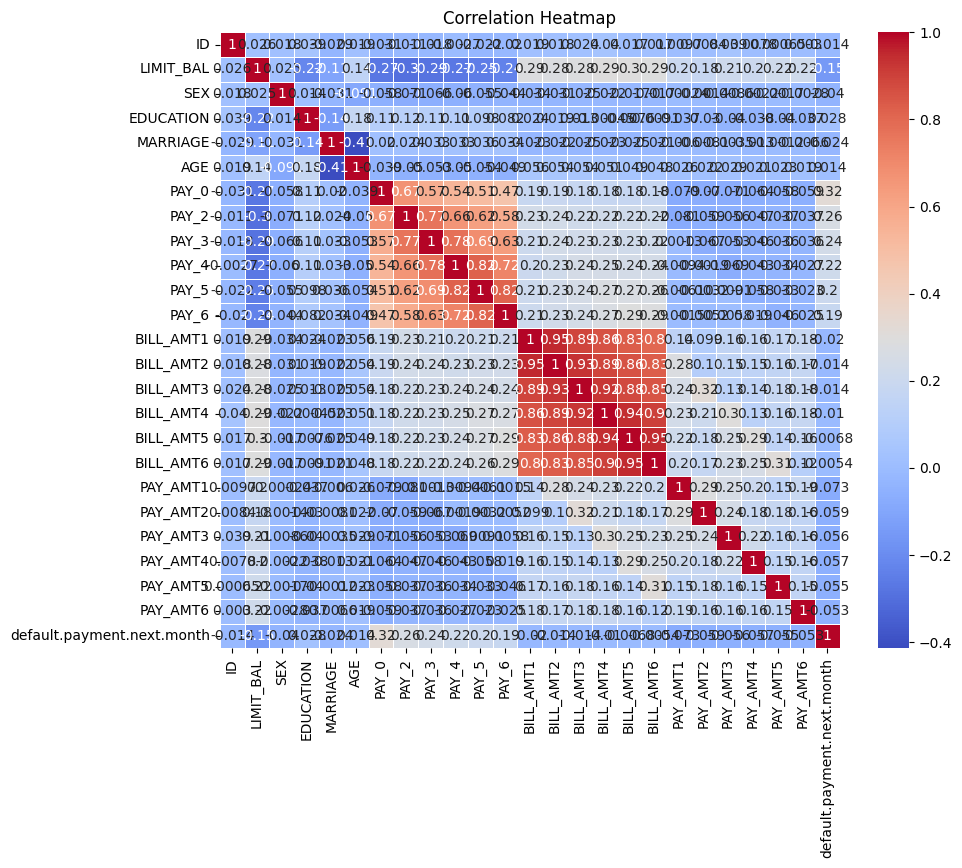

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df.SEX.unique()

array([2, 1])

doesn't have ambiguous data or inconsistent formatting




In [ ]:
df.EDUCATION.unique()

array([2, 1, 3, 5, 4, 6, 0])

5 and 6 represent unknowns; we can drop these cells

In [ ]:
df.MARRIAGE.unique()

array([1, 2, 3, 0])

doesn't have ambiguous data or inconsistent formatting

In [ ]:
df.AGE.unique()

array([24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 40, 27, 47,
       33, 32, 54, 58, 22, 25, 31, 46, 42, 43, 45, 56, 44, 53, 38, 63, 36,
       52, 48, 55, 60, 50, 75, 61, 73, 59, 21, 67, 66, 62, 70, 72, 64, 65,
       71, 69, 68, 79, 74])

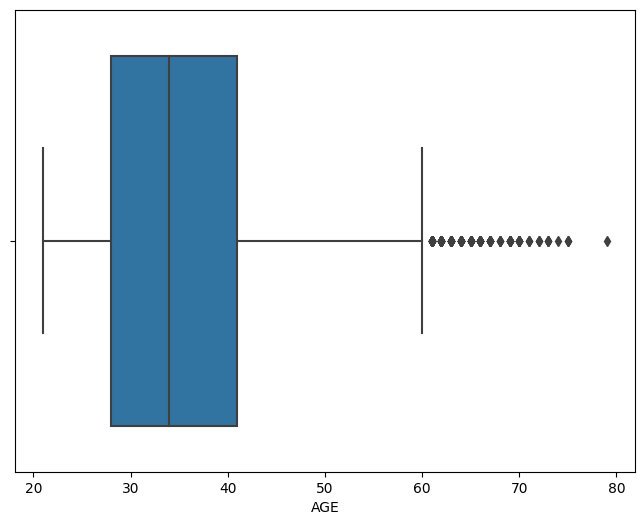

In [ ]:
# Choose the feature you want to create a boxplot for
feature_to_plot = df.AGE
# Create a boxplot using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x=feature_to_plot)
plt.show()

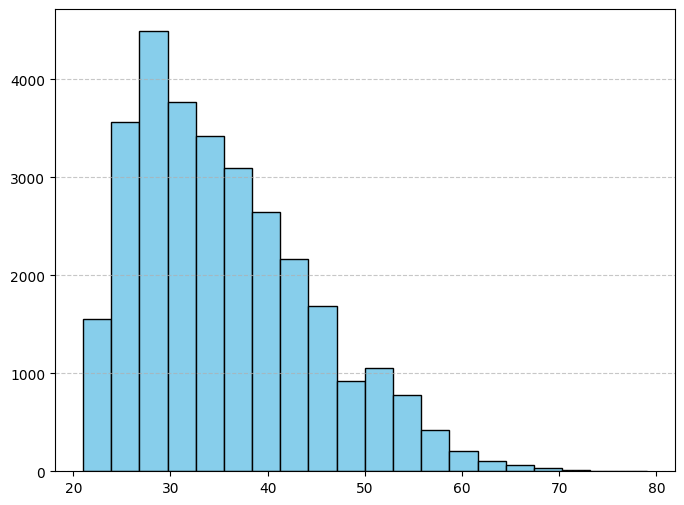

In [ ]:
# Choose the feature you want to create a histogram for
feature_to_plot = df.AGE

# Create a histogram using Matplotlib
plt.figure(figsize=(8, 6))
plt.hist(feature_to_plot, bins=20, color='skyblue', edgecolor='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

normalization can be used for AGE feature

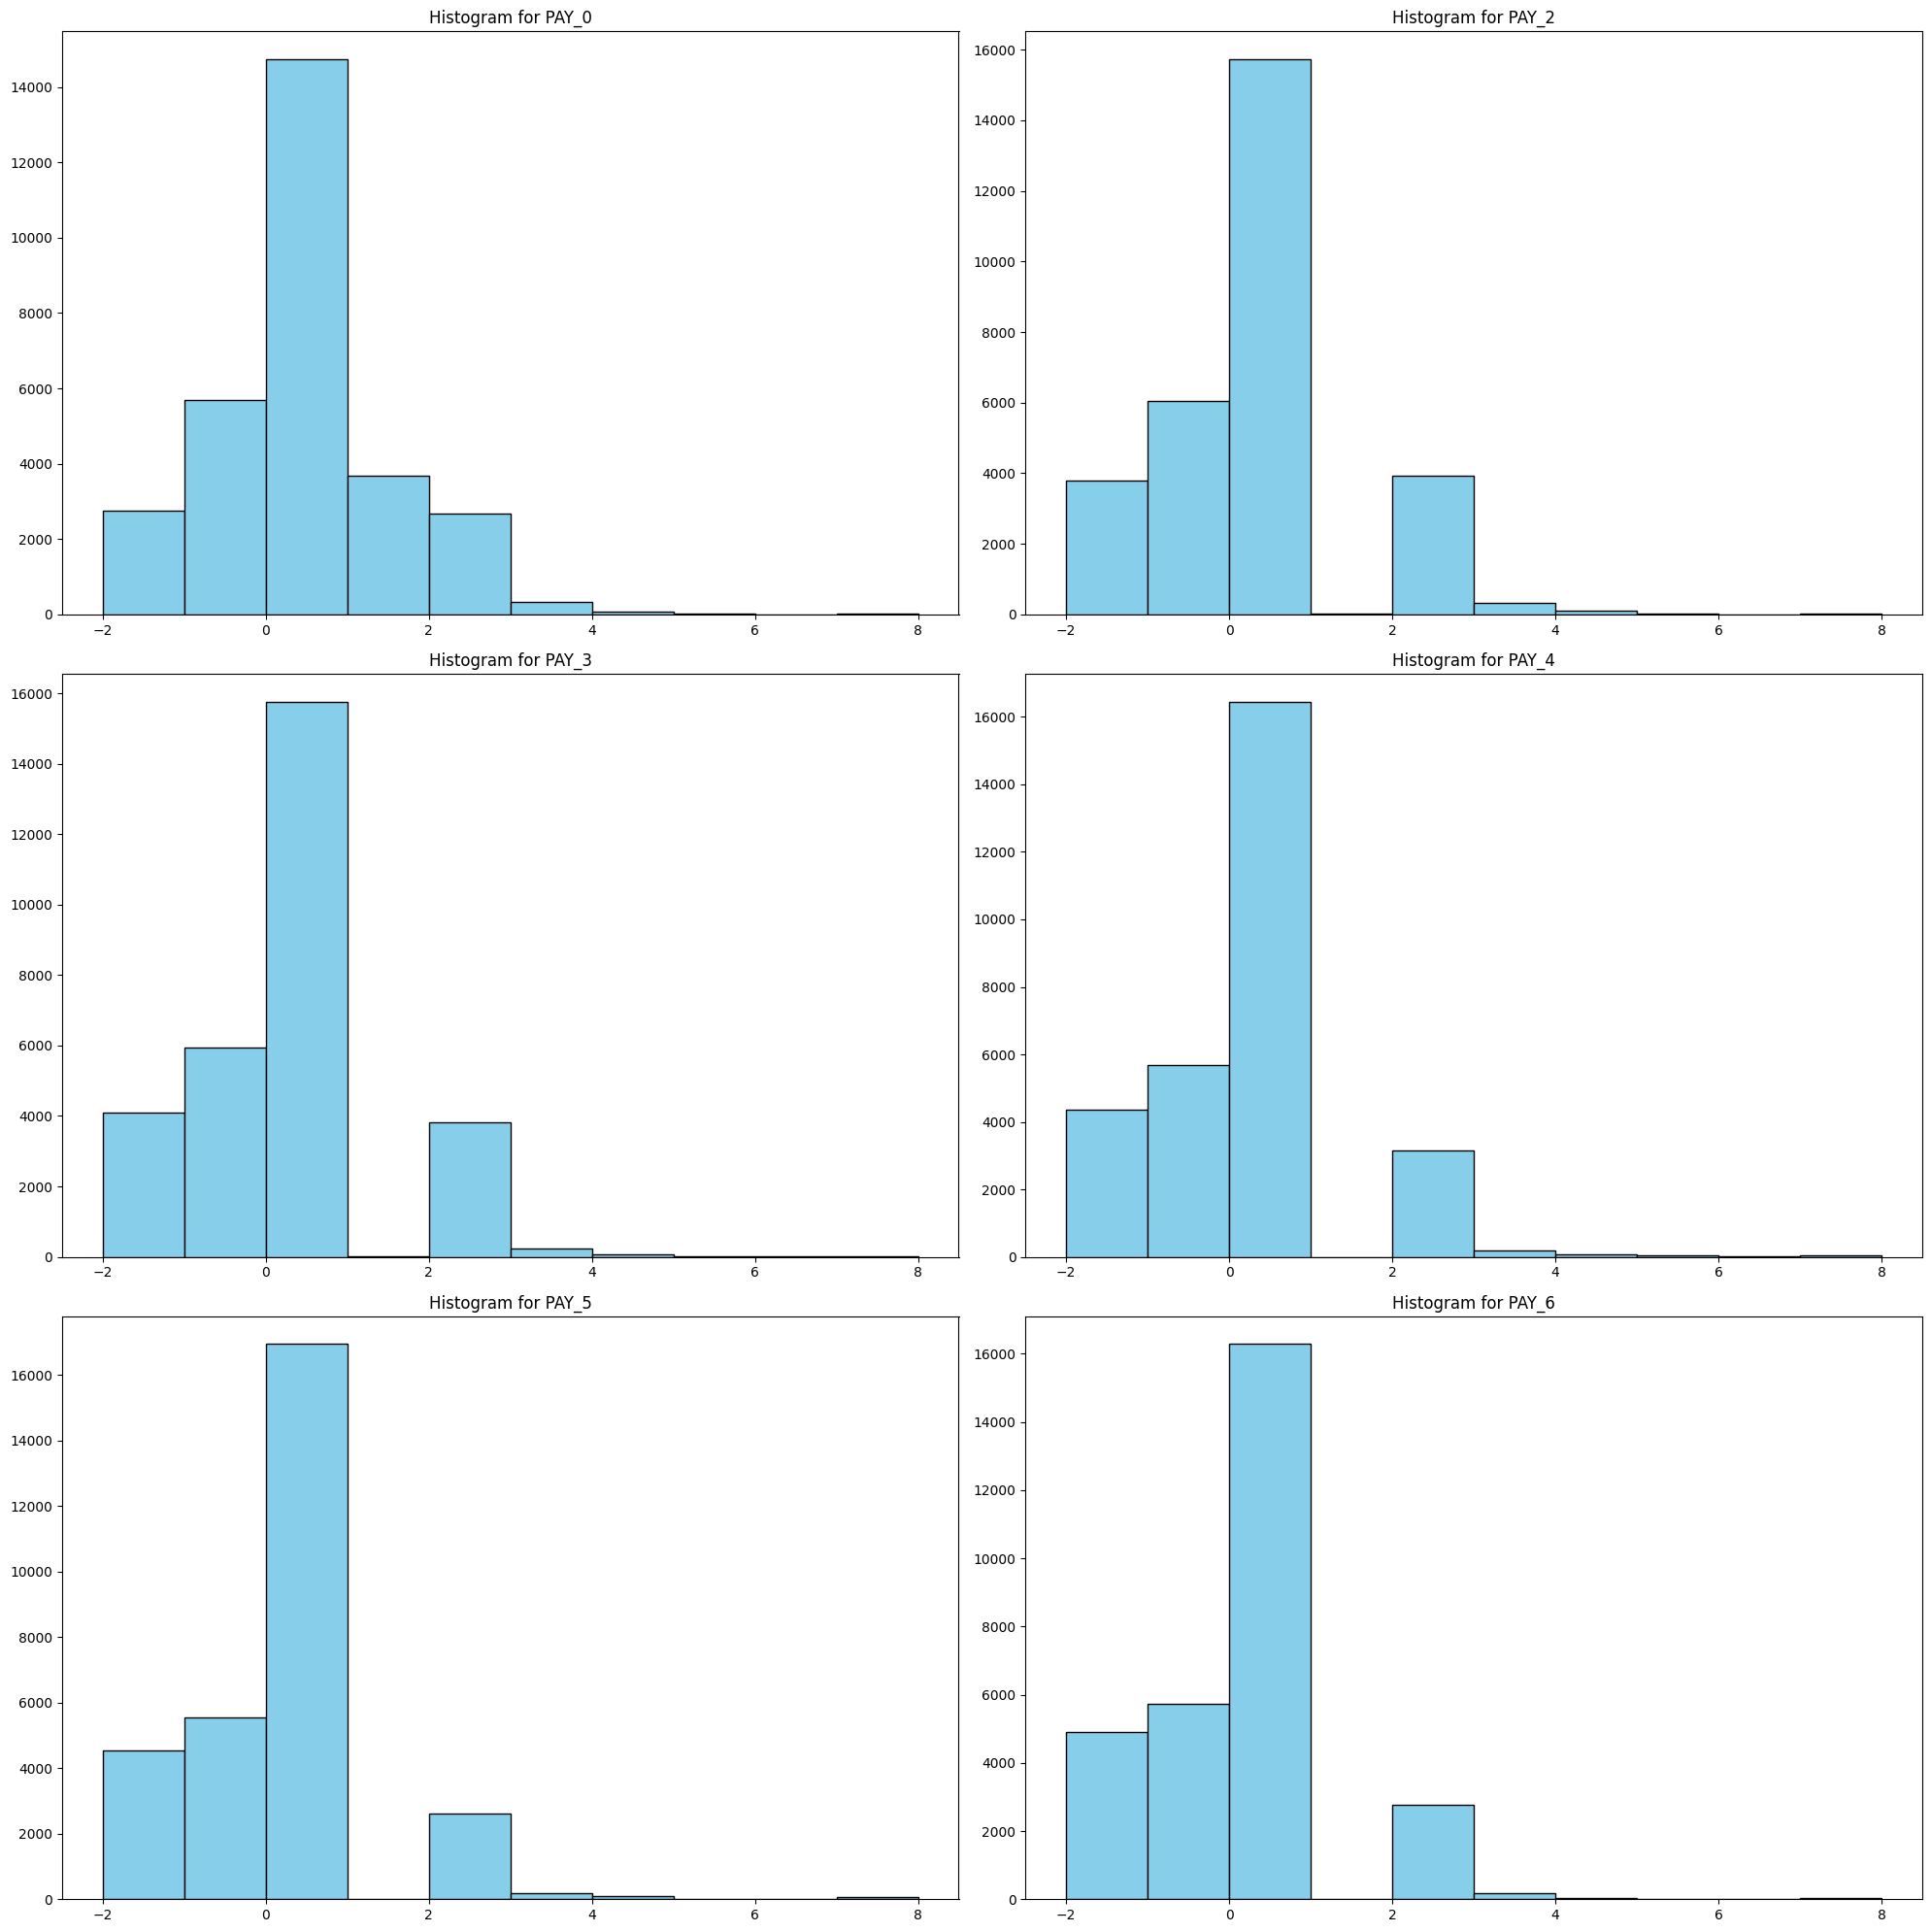

In [ ]:

viz_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(20, 20), squeeze=False)

for idx, column in enumerate(viz_columns):
    ax = axes[idx // 2, idx % 2]
    ax.hist(df[column], color='skyblue', edgecolor='black')
    ax.set_title(f'Histogram for {column}')  # Set a title for each subplot

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()


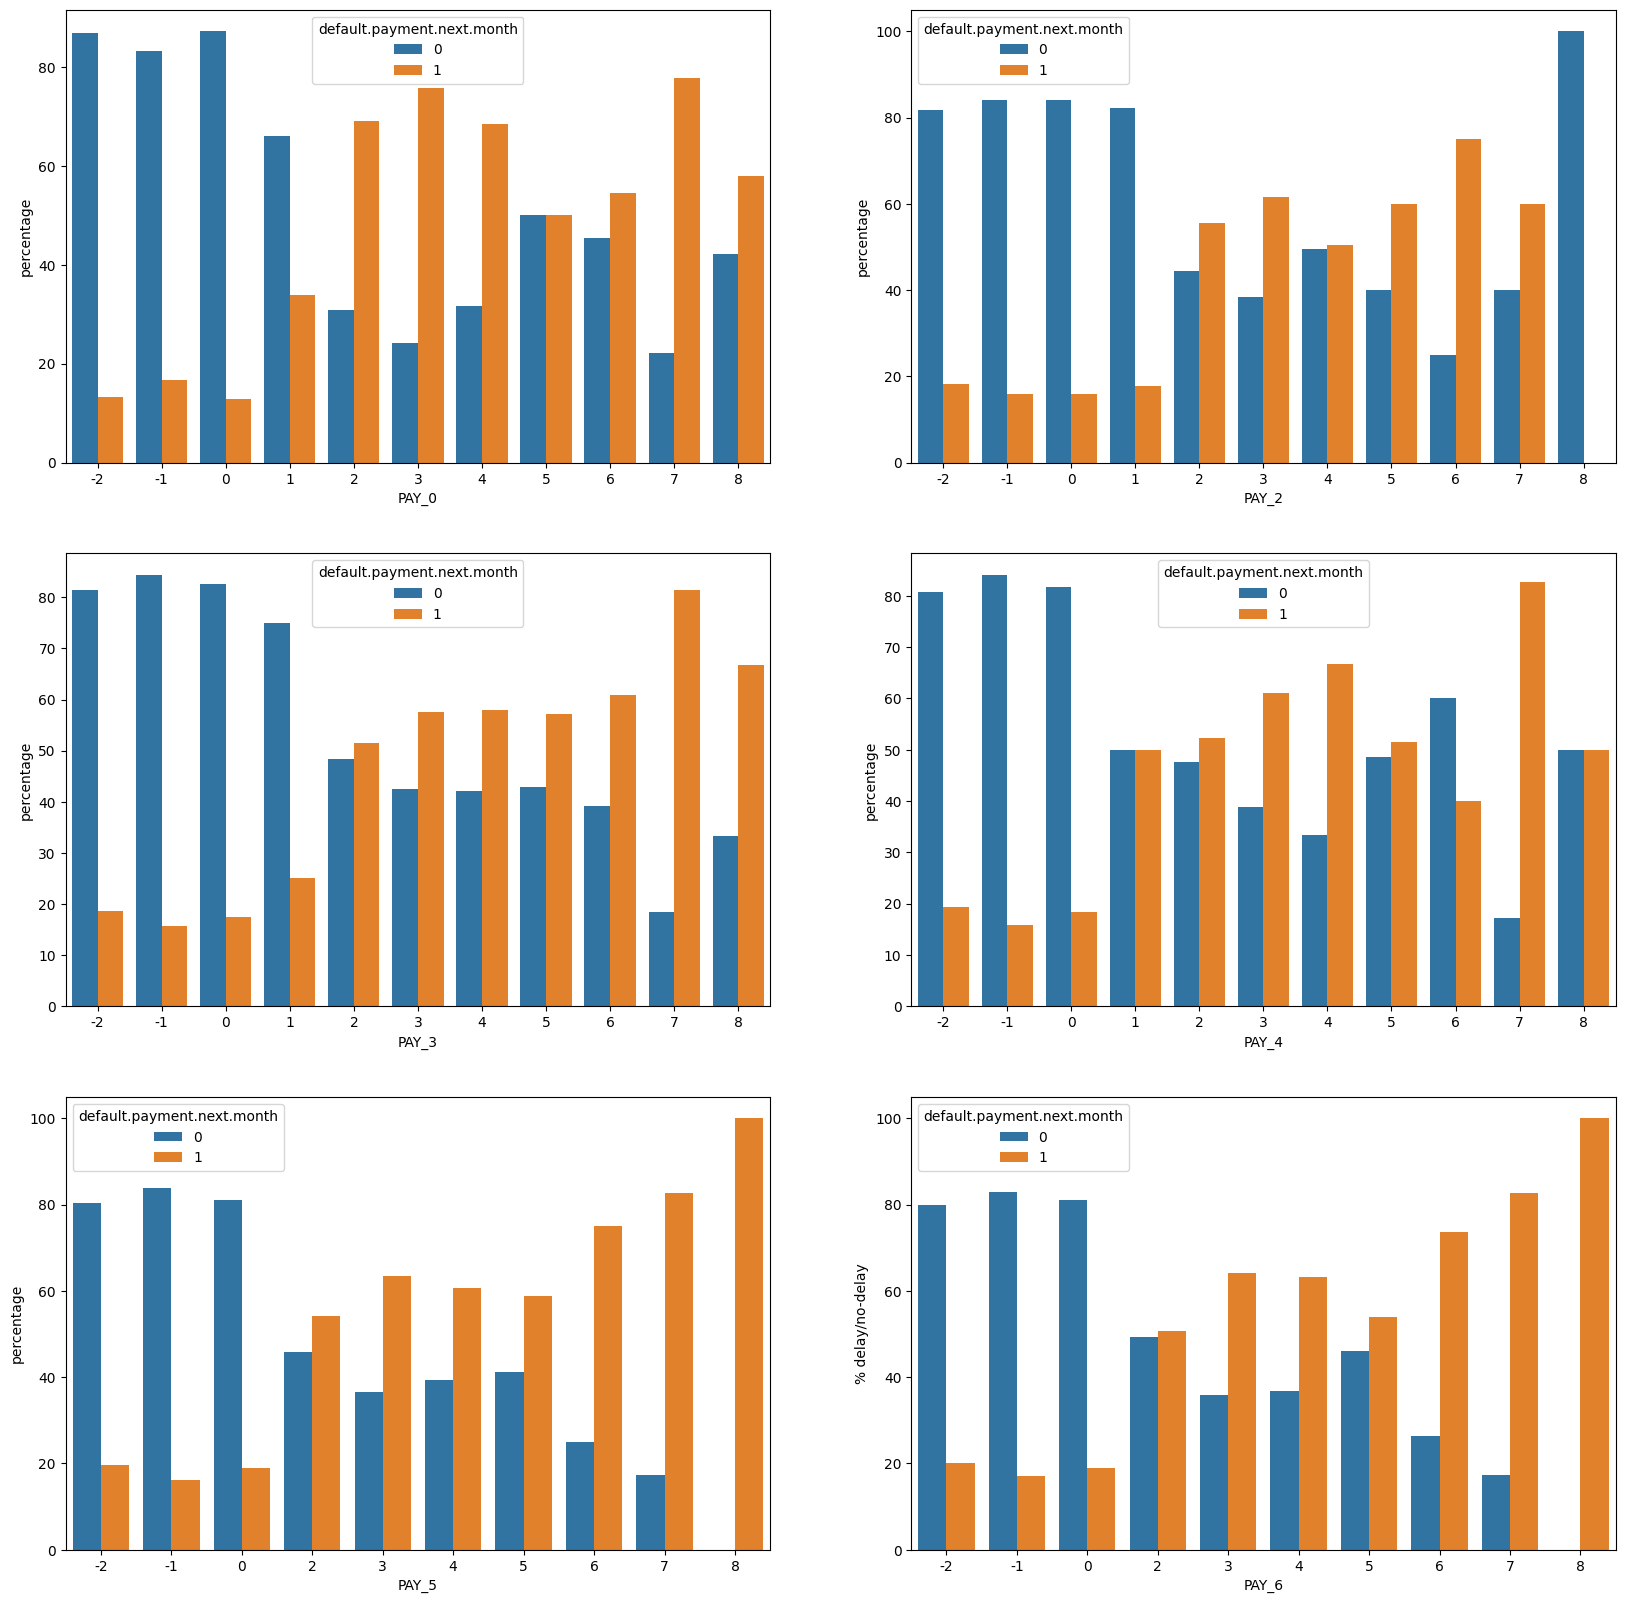

In [ ]:
viz_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
fig, axes = plt.subplots(3, 2, figsize=(20,20), squeeze=False)
# fig.autofmt_xdate(rotation=90)

for idx, column in enumerate(viz_columns):
    ax = axes[idx//2, idx%2]
    temp = df.groupby(column)['default.payment.next.month'].value_counts(normalize=True).rename('percentage').\
    mul(100).reset_index().sort_values(column)
    sns.barplot(x=column, y="percentage", hue="default.payment.next.month", data=temp, ax=ax)
    plt.ylabel('% delay/no-delay')


plt.show()

- From the last chart, we can observe that people who are late to pay are most likely to not pay next month (0) ans vice versa (1).




In [ ]:
df2 = pd.DataFrame()
df2['DUE_1']=df['BILL_AMT1']-df['PAY_AMT1']
df2['DUE_2']=df['BILL_AMT2']-df['PAY_AMT2']
df2['DUE_3']=df['BILL_AMT3']-df['PAY_AMT3']
df2['DUE_4']=df['BILL_AMT4']-df['PAY_AMT4']
df2['DUE_5']=df['BILL_AMT5']-df['PAY_AMT5']
df2['DUE_6']=df['BILL_AMT6']-df['PAY_AMT6']
df2.head()

,DUE_1,DUE_2,DUE_3,DUE_4,DUE_5,DUE_6
0,3913.0,2413.0,689.0,0.0,0.0,0.0
1,2682.0,725.0,1682.0,2272.0,3455.0,1261.0
2,27721.0,12527.0,12559.0,13331.0,13948.0,10549.0
3,44990.0,46214.0,48091.0,27214.0,27890.0,28547.0
4,6617.0,-31011.0,25835.0,11940.0,18457.0,18452.0


we can use the difference to see if it can effect

#Data Cleaning

In [ ]:
df = df.rename(columns={'PAY_0': 'PAY_1'})
df = df.rename(columns={'default.payment.next.month':'default_payment'})
mask = (df['EDUCATION'] != 5) & (df['EDUCATION'] != 6)
df = df[mask]

In [ ]:
df['EDUCATION'].unique

<bound method Series.unique of 0        2
1        2
2        2
3        2
4        2
        ..
29995    3
29996    3
29997    2
29998    3
29999    2
Name: EDUCATION, Length: 29669, dtype: int64>

#Model Selection

##Data Preprocessing

In [ ]:
X = df.drop(['ID','default_payment'],axis='columns')
y = df['default_payment']

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

##Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_validation_pred = model.predict(X_validation)
accuracy_validation = accuracy_score(y_validation, y_validation_pred)
print(f"Validation Accuracy: {accuracy_validation * 100:.2f}%")

# Make predictions on the test data
y_test_pred = model.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")
# Calculate precision
precision = precision_score(y_test, y_test_pred)

# Calculate recall
recall = recall_score(y_test, y_test_pred)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
f1score = f1_score(y_test, y_test_pred)

print(f"F1-Score: {f1score:.2f}")

Validation Accuracy: 77.97%
Test Accuracy: 80.03%
Precision: 1.00
Recall: 0.00
F1-Score: 0.01


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


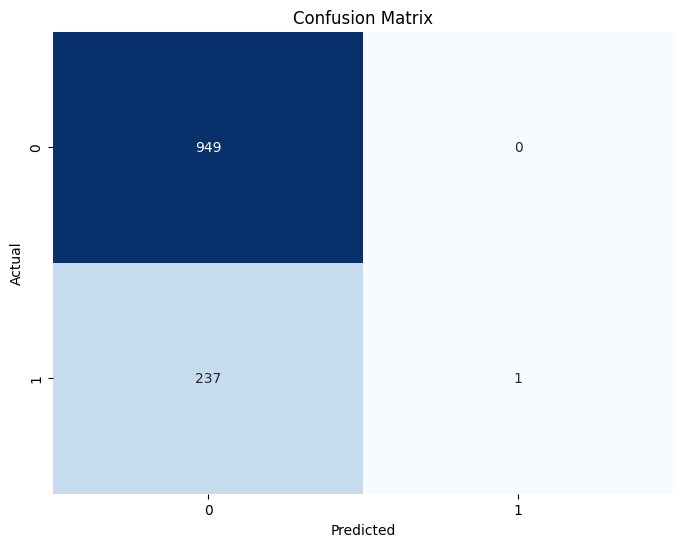

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##SVM

Validation Accuracy: 78.03%
Test Accuracy: 79.87%
Precision: 0.45
Recall: 0.02
F1-Score: 0.04


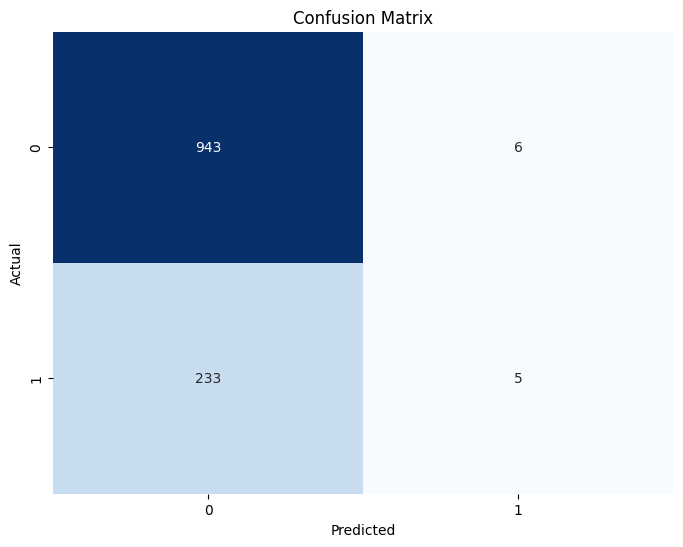

In [ ]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
y_validation_pred = svm.predict(X_validation)
accuracy_validation = accuracy_score(y_validation, y_validation_pred)
print(f"Validation Accuracy: {accuracy_validation * 100:.2f}%")

# Make predictions on the test data
y_test_pred = svm.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")
# Calculate precision
precision = precision_score(y_test, y_test_pred)
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(y_test, y_test_pred)
print(f"Recall: {recall:.2f}")

# Calculate f1_score

f1score = f1_score(y_test, y_test_pred)
print(f"F1-Score: {f1score:.2f}")

#Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

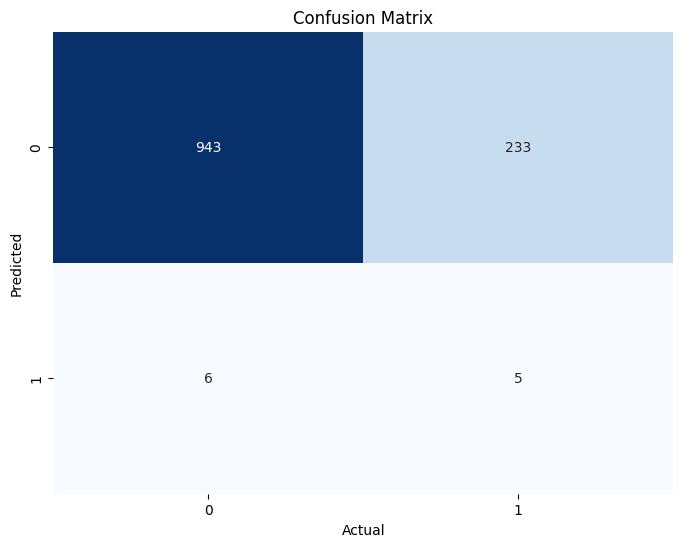

In [ ]:
conf_matrix = confusion_matrix(y_test, y_test_pred).T

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##Random Forest

Validation Accuracy: 80.89%
Test Accuracy: 81.55%
Precision: 0.56
Recall: 0.38
F1-Score: 0.45


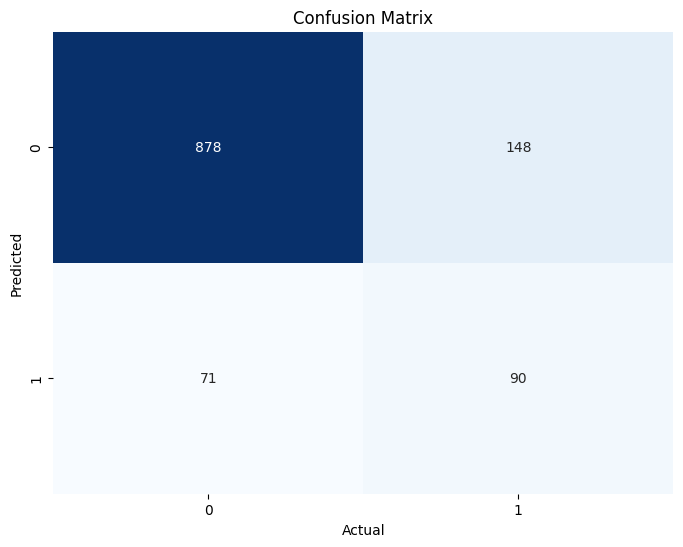

In [ ]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
y_validation_pred = rf.predict(X_validation)
accuracy_validation = accuracy_score(y_validation, y_validation_pred)
print(f"Validation Accuracy: {accuracy_validation * 100:.2f}%")

# Make predictions on the test data
y_test_pred = rf.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")
# Calculate precision
precision = precision_score(y_test, y_test_pred)
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(y_test, y_test_pred)
print(f"Recall: {recall:.2f}")

# Calculate f1_score

f1score = f1_score(y_test, y_test_pred)
print(f"F1-Score: {f1score:.2f}")

#Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred).T

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##Decision Tree

Validation Accuracy: 71.31%
Test Accuracy: 74.73%
Precision: 0.39
Recall: 0.46
F1-Score: 0.42


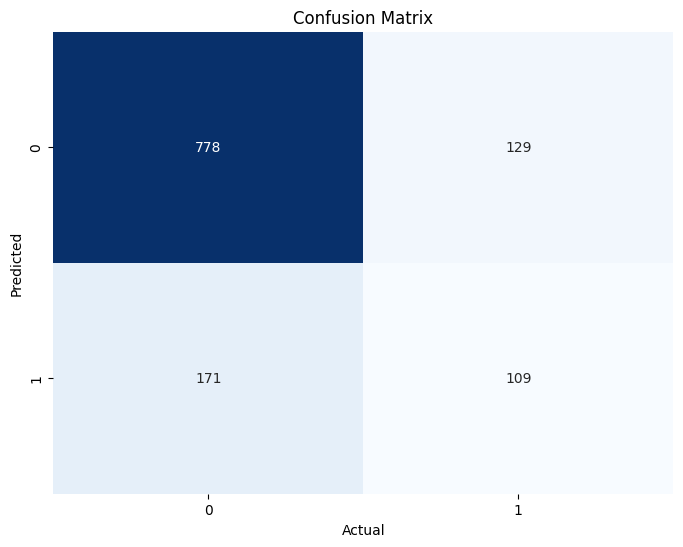

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_validation_pred = clf.predict(X_validation)
accuracy_validation = accuracy_score(y_validation, y_validation_pred)
print(f"Validation Accuracy: {accuracy_validation * 100:.2f}%")

# Make predictions on the test data
y_test_pred = clf.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")
# Calculate precision
precision = precision_score(y_test, y_test_pred)
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(y_test, y_test_pred)
print(f"Recall: {recall:.2f}")

# Calculate f1_score

f1score = f1_score(y_test, y_test_pred)
print(f"F1-Score: {f1score:.2f}")

#Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred).T

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###XGBoost

Validation Accuracy: 81.31%
Test Accuracy: 82.90%
Precision: 0.61
Recall: 0.39
F1-Score: 0.48


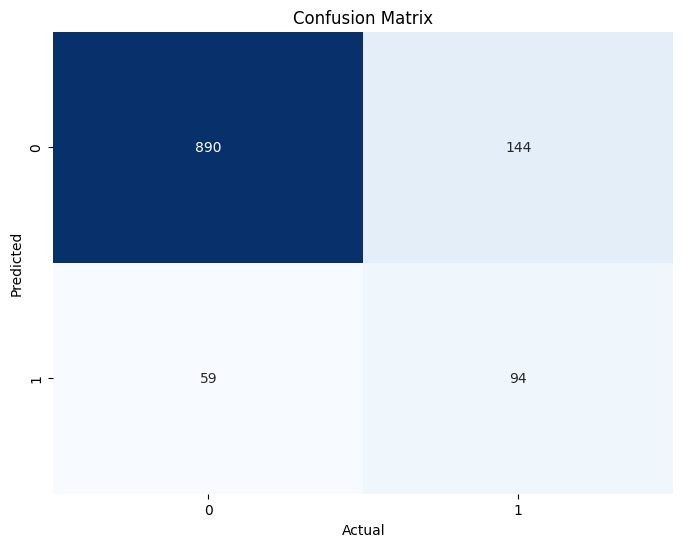

In [ ]:
import xgboost as xgb
xgb = xgb.XGBClassifier(n_estimators = 38,eta = 0.3)
xgb.fit(X_train, y_train)
y_validation_pred = xgb.predict(X_validation)
accuracy_validation = accuracy_score(y_validation, y_validation_pred)
print(f"Validation Accuracy: {accuracy_validation * 100:.2f}%")

# Make predictions on the test data
y_test_pred = xgb.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")
# Calculate precision
precision = precision_score(y_test, y_test_pred)
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(y_test, y_test_pred)
print(f"Recall: {recall:.2f}")

# Calculate f1_score

f1score = f1_score(y_test, y_test_pred)
print(f"F1-Score: {f1score:.2f}")

#Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred).T

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Drop 12 columns of BILL_AMT and  PAY_AMT and Replace them with their difference

In [ ]:
df2

,DUE_1,DUE_2,DUE_3,DUE_4,DUE_5,DUE_6
0,3913.0,2413.0,689.0,0.0,0.0,0.0
1,2682.0,725.0,1682.0,2272.0,3455.0,1261.0
2,27721.0,12527.0,12559.0,13331.0,13948.0,10549.0
3,44990.0,46214.0,48091.0,27214.0,27890.0,28547.0
4,6617.0,-31011.0,25835.0,11940.0,18457.0,18452.0
...,...,...,...,...,...,...
29995,180448.0,172815.0,203362.0,84957.0,26237.0,14980.0
29996,-154.0,-1698.0,-5496.0,8850.0,5190.0,0.0
29997,3565.0,3356.0,-19242.0,16678.0,18582.0,16257.0
29998,-87545.0,74970.0,75126.0,50848.0,-41109.0,47140.0


In [ ]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


##Data Preprocessing

In [ ]:
df3 = pd.concat([df, df2], axis=1)
df3.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment,DUE_1,DUE_2,DUE_3,DUE_4,DUE_5,DUE_6
0,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,1.0,3913.0,2413.0,689.0,0.0,0.0,0.0
1,2.0,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,1000.0,0.0,2000.0,1.0,2682.0,725.0,1682.0,2272.0,3455.0,1261.0
2,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,1000.0,1000.0,5000.0,0.0,27721.0,12527.0,12559.0,13331.0,13948.0,10549.0
3,4.0,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,1100.0,1069.0,1000.0,0.0,44990.0,46214.0,48091.0,27214.0,27890.0,28547.0
4,5.0,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,9000.0,689.0,679.0,0.0,6617.0,-31011.0,25835.0,11940.0,18457.0,18452.0


In [ ]:
X = df3.drop(['ID','AGE','default_payment','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'],axis='columns')
y = df['default_payment']

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

ValueError: ignored

##Model Selection

###Logistic Regression

In [ ]:
log2 = LogisticRegression()
log2.fit(X_train, y_train)
y_validation_pred = log2.predict(X_validation)
accuracy_validation = accuracy_score(y_validation, y_validation_pred)
print(f"Validation Accuracy: {accuracy_validation * 100:.2f}%")

# Make predictions on the test data
y_test_pred = log2.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")
# Calculate precision
precision = precision_score(y_test, y_test_pred)

# Calculate recall
recall = recall_score(y_test, y_test_pred)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
f1score = f1_score(y_test, y_test_pred)

print(f"F1-Score: {f1score:.2f}")

Validation Accuracy: 77.97%
Test Accuracy: 80.03%
Precision: 1.00
Recall: 0.00
F1-Score: 0.01


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


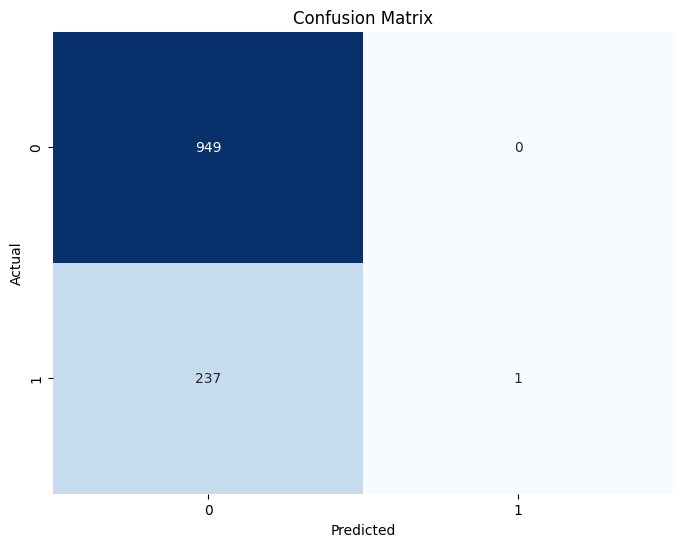

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###SVM

Validation Accuracy: 78.03%
Test Accuracy: 79.87%
Precision: 0.45
Recall: 0.02
F1-Score: 0.04


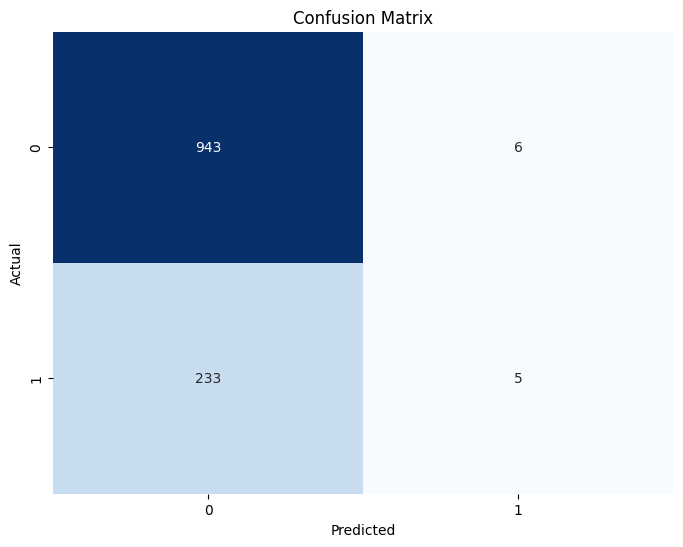

In [ ]:
svm2 = SVC(gamma='auto')
svm2.fit(X_train, y_train)
y_validation_pred = svm2.predict(X_validation)
accuracy_validation = accuracy_score(y_validation, y_validation_pred)
print(f"Validation Accuracy: {accuracy_validation * 100:.2f}%")

# Make predictions on the test data
y_test_pred = svm2.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")
# Calculate precision
precision = precision_score(y_test, y_test_pred)
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(y_test, y_test_pred)
print(f"Recall: {recall:.2f}")

# Calculate f1_score

f1score = f1_score(y_test, y_test_pred)
print(f"F1-Score: {f1score:.2f}")

#Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

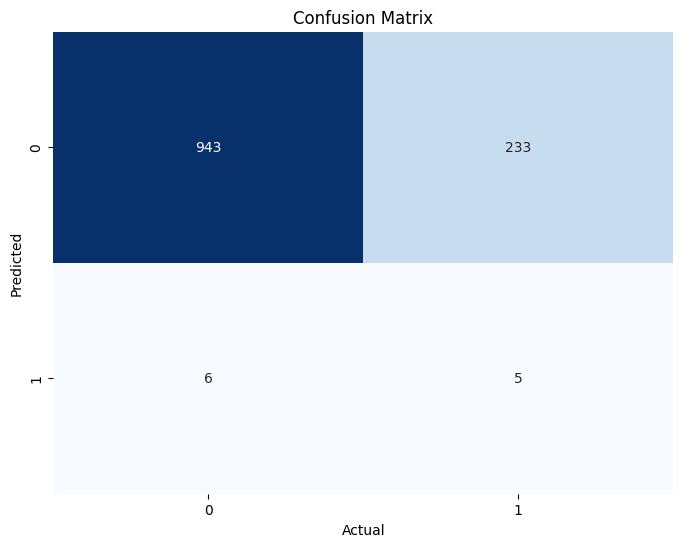

In [ ]:
conf_matrix = confusion_matrix(y_test, y_test_pred).T

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()




###Random Forest

Validation Accuracy: 80.77%
Test Accuracy: 82.31%
Precision: 0.59
Recall: 0.39
F1-Score: 0.47


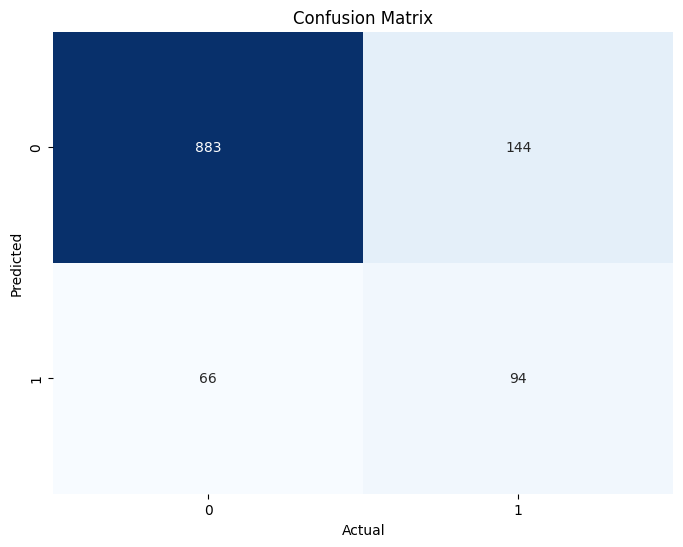

In [ ]:
rf2 = RandomForestClassifier(n_estimators=40)
rf2.fit(X_train, y_train)
y_validation_pred = rf2.predict(X_validation)
accuracy_validation = accuracy_score(y_validation, y_validation_pred)
print(f"Validation Accuracy: {accuracy_validation * 100:.2f}%")

# Make predictions on the test data
y_test_pred = rf2.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")
# Calculate precision
precision = precision_score(y_test, y_test_pred)
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(y_test, y_test_pred)
print(f"Recall: {recall:.2f}")

# Calculate f1_score

f1score = f1_score(y_test, y_test_pred)
print(f"F1-Score: {f1score:.2f}")

#Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred).T

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###Decision Tree

Validation Accuracy: 71.31%
Test Accuracy: 74.73%
Precision: 0.39
Recall: 0.46
F1-Score: 0.42


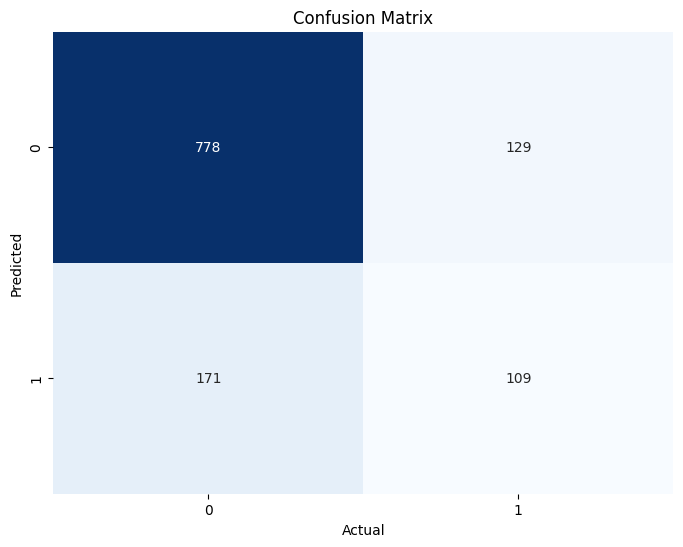

In [ ]:
clf2 = DecisionTreeClassifier(random_state=42)
clf2.fit(X_train, y_train)
y_validation_pred = clf2.predict(X_validation)
accuracy_validation = accuracy_score(y_validation, y_validation_pred)
print(f"Validation Accuracy: {accuracy_validation * 100:.2f}%")

# Make predictions on the test data
y_test_pred = clf2.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")
# Calculate precision
precision = precision_score(y_test, y_test_pred)
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(y_test, y_test_pred)
print(f"Recall: {recall:.2f}")

# Calculate f1_score

f1score = f1_score(y_test, y_test_pred)
print(f"F1-Score: {f1score:.2f}")

#Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred).T

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###XGBoost

Validation Accuracy: 81.78%
Test Accuracy: 82.81%
Precision: 0.61
Recall: 0.39
F1-Score: 0.47


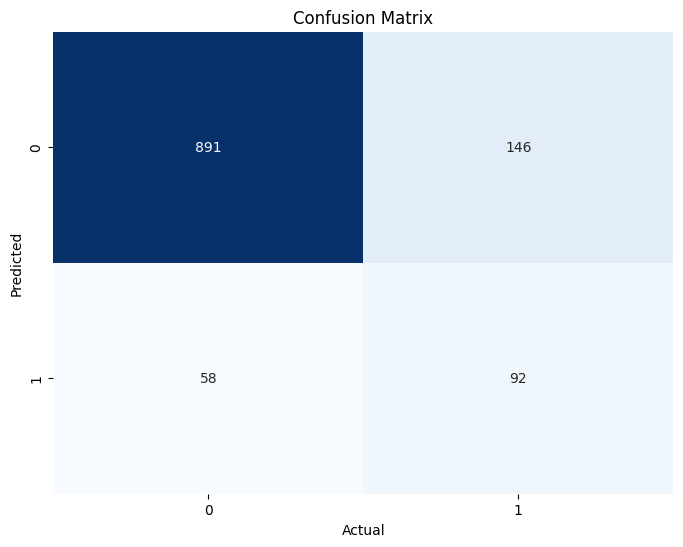

In [ ]:
import xgboost as xgb
xgb2 = xgb.XGBClassifier(n_estimators=38,gamma=4)
xgb2.fit(X_train, y_train)
y_validation_pred = xgb2.predict(X_validation)
accuracy_validation = accuracy_score(y_validation, y_validation_pred)
print(f"Validation Accuracy: {accuracy_validation * 100:.2f}%")

# Make predictions on the test data
y_test_pred = xgb2.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")
# Calculate precision
precision = precision_score(y_test, y_test_pred)
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(y_test, y_test_pred)
print(f"Recall: {recall:.2f}")

# Calculate f1_score

f1score = f1_score(y_test, y_test_pred)
print(f"F1-Score: {f1score:.2f}")

#Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred).T

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Drop negative Bill_AMT

In [ ]:
df4 = pd.DataFrame()

In [ ]:
df4 = df3[df3['BILL_AMT1'] > 0]
df4 = df3[df3['BILL_AMT2'] > 0]
df4 = df3[df3['BILL_AMT3'] > 0]
df4 = df3[df3['BILL_AMT4'] > 0]
df4 = df3[df3['BILL_AMT5'] > 0]
df4 = df3[df3['BILL_AMT6'] > 0]
df4

NameError: ignored

In [ ]:
df4['DUE_1'] = np.log(df4['DUE_1'])
df4['DUE_2'] = np.log(df4['DUE_2'])
df4['DUE_3'] = np.log(df4['DUE_3'])
df4['DUE_4'] = np.log(df4['DUE_4'])
df4['DUE_5'] = np.log(df4['DUE_5'])
df4['DUE_6'] = np.log(df4['DUE_6'])
df4['LIMIT_BAL']  = np.log(df4['LIMIT_BAL'])
df4['AGE'] = np.log(df4['AGE'])
df4

In [ ]:
df[df['BILL_AMT1'] < df['PAY_AMT1']][['PAY_1','LIMIT_BAL','BILL_AMT1','PAY_AMT1','BILL_AMT2','PAY_AMT2','BILL_AMT3','PAY_AMT3','BILL_AMT4','PAY_AMT4','BILL_AMT5','PAY_AMT5','BILL_AMT6','PAY_AMT6','default_payment']]

In [ ]:
X = df3.drop(['ID','AGE','default_payment','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'],axis='columns')
y = df['default_payment']

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

##Model Selection

###Logistic Regression

In [ ]:
log4 = LogisticRegression()
log4.fit(X_train, y_train)
y_validation_pred = log4.predict(X_validation)
accuracy_validation = accuracy_score(y_validation, y_validation_pred)
print(f"Validation Accuracy: {accuracy_validation * 100:.2f}%")

# Make predictions on the test data
y_test_pred = log4.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")
# Calculate precision
precision = precision_score(y_test, y_test_pred)

# Calculate recall
recall = recall_score(y_test, y_test_pred)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
f1score = f1_score(y_test, y_test_pred)

print(f"F1-Score: {f1score:.2f}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###SVM

In [ ]:
svm4 = SVC(gamma='auto')
svm3.fit(X_train, y_train)
y_validation_pred = svm3.predict(X_validation)
accuracy_validation = accuracy_score(y_validation, y_validation_pred)
print(f"Validation Accuracy: {accuracy_validation * 100:.2f}%")

# Make predictions on the test data
y_test_pred = svm3.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")
# Calculate precision
precision = precision_score(y_test, y_test_pred)
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(y_test, y_test_pred)
print(f"Recall: {recall:.2f}")

# Calculate f1_score

f1score = f1_score(y_test, y_test_pred)
print(f"F1-Score: {f1score:.2f}")

#Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




###Random Forest

In [ ]:
rf3 = RandomForestClassifier(n_estimators=40)
rf3.fit(X_train, y_train)
y_validation_pred = rf3.predict(X_validation)
accuracy_validation = accuracy_score(y_validation, y_validation_pred)
print(f"Validation Accuracy: {accuracy_validation * 100:.2f}%")

# Make predictions on the test data
y_test_pred = rf3.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")
# Calculate precision
precision = precision_score(y_test, y_test_pred)
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(y_test, y_test_pred)
print(f"Recall: {recall:.2f}")

# Calculate f1_score

f1score = f1_score(y_test, y_test_pred)
print(f"F1-Score: {f1score:.2f}")

#Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred).T

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###Decision Tree

In [ ]:
clf3 = DecisionTreeClassifier(random_state=42)
clf3.fit(X_train, y_train)
y_validation_pred = clf3.predict(X_validation)
accuracy_validation = accuracy_score(y_validation, y_validation_pred)
print(f"Validation Accuracy: {accuracy_validation * 100:.2f}%")

# Make predictions on the test data
y_test_pred = clf3.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")
# Calculate precision
precision = precision_score(y_test, y_test_pred)
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(y_test, y_test_pred)
print(f"Recall: {recall:.2f}")

# Calculate f1_score

f1score = f1_score(y_test, y_test_pred)
print(f"F1-Score: {f1score:.2f}")

#Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred).T

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###XGBoost

In [ ]:
import xgboost as xgb
xgb4 = xgb.XGBClassifier(n_estimators = 38,gamma = 4)
xgb4.fit(X_train, y_train)
y_validation_pred = xgb4.predict(X_validation)
accuracy_validation = accuracy_score(y_validation, y_validation_pred)
print(f"Validation Accuracy: {accuracy_validation * 100:.2f}%")

# Make predictions on the test data
y_test_pred = xgb4.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")
# Calculate precision
precision = precision_score(y_test, y_test_pred)
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(y_test, y_test_pred)
print(f"Recall: {recall:.2f}")

# Calculate f1_score

f1score = f1_score(y_test, y_test_pred)
print(f"F1-Score: {f1score:.2f}")

#Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred).T

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The Best model is XGBoost